   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

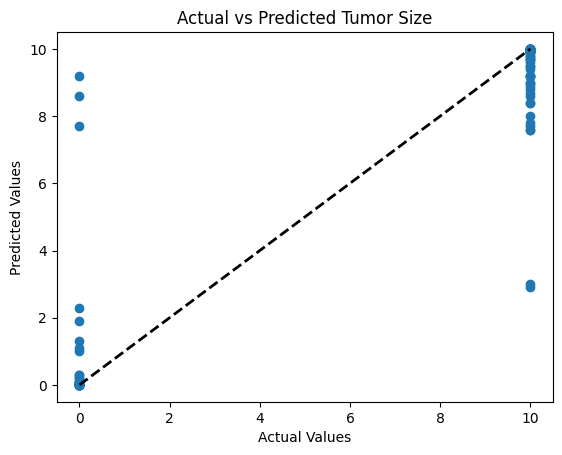

In [2]:
# Step 1: Install necessary libraries
!pip install pandas scikit-learn matplotlib

# Step 2: Load the Dataset
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the Breast Cancer Wisconsin dataset
cancer_data = load_breast_cancer()
data = pd.DataFrame(data=cancer_data.data, columns=cancer_data.feature_names)

# Add the target variable (tumor size, assuming it correlates with target values)
data['target'] = cancer_data.target * 10  # Hypothetical continuous target

# Display the first few rows of the dataset
print(data.head())

# Step 3: Preprocess the Data
print(data.isnull().sum())  # Check for missing values
X = data.drop('target', axis=1)  # Features
y = data['target']                # Target variable (hypothetical tumor size)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Build the Regression Model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)  # Train the model

# Step 5: Make Predictions
y_pred = model.predict(X_test)

# Step 6: Evaluate the Model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Step 7: Visualize Results
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Tumor Size')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)  # Diagonal line
plt.show()
